# Linear Regression - Custom Implementation

## Overview
This Jupyter Notebook shows a custom implementation of linear regression. By employing two distinct optimization techniques—Batch Gradient Descent (BGD) and Stochastic Gradient Descent (SGD)—we aim to predict the median value of owner-occupied homes. This hands-on approach allows us to explore the internal mechanics of linear regression models and understand their behavior across different optimization methods.

## Objectives
- Custom Implementation: Develop linear regression from scratch to gain a deeper understanding of its underlying principles and operations.
- Data Preparation: Load and preprocess data to ensure it is suitable for model training.
#### Model Implementation and Comparison:
- Batch Gradient Descent: Updates all model parameters simultaneously using the entire dataset.
- Stochastic Gradient Descent: Updates model parameters incrementally, using one data point at a time.
#### Evaluation and Analysis: 
- Evaluate the models using Mean Squared Error (MSE).
- Prediction: Use the trained models to make predictions on unseen test data and analyze the outcomes.
### Methodology
- Data Loading: Import the training and testing datasets.
- Feature Normalization: Standardize the features to have zero mean and unit variance to aid the optimization process.
- Model Training: Train models using custom implementations of both Batch and Stochastic Gradient Descent.
Monitor and adjust learning parameters to explore their impact on model performance.

- Evaluation: Calculate MSE on training data to assess model performance.
- Prediction: Apply the models to predict housing prices on new, unseen test data.
### Expected Outcomes
By custom implementing linear regression models and applying them to a real-world dataset, we expect to gain detailed insights into the functioning and efficiency of gradient descent methods. This will help us evaluate their practical applicability in predictive modeling and understand the dynamics of model training in different scenarios.

In [1]:
# Import libraries and set up environment 

import pandas as pd
import numpy as np

np.random.seed(1)
np.set_printoptions(formatter={'float_kind': lambda x: "%.3f" % x})

In [2]:
# Load and Prepare the data

# Load the data
data = pd.read_csv('boston_train.csv')

# Split data into features and target
y = data.iloc[:, -1].to_numpy()  # Convert to numpy array
X = data.iloc[:, :-1]            # All columns except the last one

# Feature normalization (standardization)
X_mean = X.mean()
X_std = X.std()
X = (X - X_mean) / X_std

# Add intercept term to handle the bias
X['X0'] = 1
X = X.to_numpy()  # Convert DataFrame to NumPy array for computation

# Initialize parameters for the regression
alpha = 0.01 # Learning rate
beta = 1  #Regularization factor
iterations = 10000 # Number of iterations

###  Convergence in Linear Regression: Comparing Batch and Stochastic Gradient Descent

#### Batch Gradient Descent
- Batch Gradient Descent is a method that updates model parameters using the entire dataset at each step. It computes the gradient of the cost function for all data points to make a single update to the parameters.

- It is used when the entire dataset can fit into memory and ensures stable, consistent updates. This method converges smoothly to the optimal parameters but can be computationally intensive for large datasets.

#### Stochastic Gradient Descent
- Stochastic Gradient Descent (SGD) updates model parameters using only one data point at a time. Each update is made as soon as the gradient is computed from a single randomly selected data point.

- SGD is beneficial for large datasets or in online learning scenarios where data arrives continuously. It is faster per update compared to batch gradient descent and can navigate local minima, but it might lead to a more irregular convergence path.

In [3]:
def bgd(X, y, w, alpha, beta, iterations):
    # Batch Gradient Descent
    n, m = X.shape
    for iteration in range(iterations):
        predictions = X.dot(w)
        errors = predictions - y
        gradient = X.T.dot(errors) / n
        w = w * (1 - alpha * beta / m) - alpha * gradient
        
        # Add convergence criteria based on gradient norm or MSE
        if np.abs(gradient).sum() < 0.1:
            break
    return w

def sgd(X, y, w, alpha, iterations):
     # Stochastic Gradient Descent
    n = len(X)
    for iteration in range(iterations):
        indices = np.random.permutation(n)
        for i in indices:
            h = X[i].dot(w)
            error = h - y[i]
            stochastic_gradient = error * X[i]
            w -= alpha * stochastic_gradient
            
            # Add convergence criteria
            if np.abs(stochastic_gradient).sum() < 0.1:
                return w
    return w

### Linear Regression Algorithm

In [4]:
def linear_regression(X, y, method='batch', alpha=0.01, beta=0.01, iterations=100):
    np.random.seed(1)
    w = np.random.rand(X.shape[1])
    
    # Select gradient descent method
    if method == 'bgd':
        w = bgd(X, y, w, alpha, beta, iterations)
    elif method == 'sgd':
        w = sgd(X, y, w, alpha, iterations)
    else:
        raise ValueError("Unsupported gradient descent method")
    
    return w

In [5]:
w_bgd = linear_regression(X, y, method='bgd', alpha=alpha, beta=beta, iterations=iterations)
print("Weights from Batch Gradient Descent:", w_bgd)

Weights from Batch Gradient Descent: [-0.757 0.766 -0.254 0.736 -1.397 2.819 -0.106 -2.372 1.359 -0.982 -1.857
 0.829 -3.380 21.031]


In [6]:
w_sgd = linear_regression(X, y, method='sgd', alpha=alpha, iterations=iterations)
print("Weights from Stochastic Gradient Descent:", w_sgd)

Weights from Stochastic Gradient Descent: [-1.352 1.441 -0.326 1.001 -1.723 2.593 -0.329 -2.653 1.028 -0.972 -2.102
 0.849 -3.768 22.357]


### Predict  New Data

In [7]:
# Load test data
data_test = pd.read_csv('boston_test.csv')
X_test = data_test
# Apply the same feature normalization to test data
X_test = (X_test - X_mean / X_std)

# Add intercept term to handle the bias for test data
X_test['X0'] = 1
X_test = X_test.to_numpy()  # Convert DataFrame to NumPy array for computation

In [8]:
# Predict function
def predict(X, w):
    return X.dot(w)

In [9]:
# Linear Regression with Batch Gradient Descent
predictions_train = predict(X, w_bgd)
predictions_test = predict(X_test, w_bgd)

# Calculate and print Mean Squared Error for both datasets
mse_train = np.mean((predictions_train - y) ** 2)

print("MSE on Training Data:", mse_train)

MSE on Training Data: 24.649976501172166


In [10]:
print(predictions_test)

[24.867]


In [11]:
# Linear Regression with Batch Gradient Descent
predictions_train = predict(X, w_sgd)
predictions_test = predict(X_test, w_sgd)

# Calculate and print Mean Squared Error for both datasets
mse_train = np.mean((predictions_train - y) ** 2)

print("MSE on Training Data:", mse_train)

MSE on Training Data: 25.182188717780658


In [12]:
print(predictions_test)

[28.804]


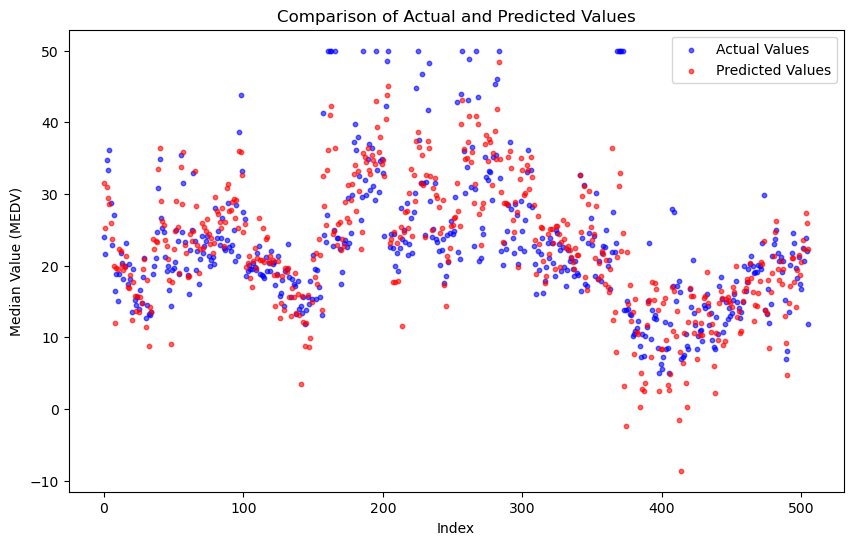

In [17]:
import matplotlib.pyplot as plt

# Generate an index array or use an existing feature
index = np.arange(len(y))

plt.figure(figsize=(10, 6))
plt.scatter(index, y, color='blue', label='Actual Values', alpha=0.6, s=10)  # Actual values in blue
plt.scatter(index, predictions_train, color='red', label='Predicted Values', alpha=0.6, s=10)  # Predictions in red
plt.xlabel('Index')
plt.ylabel('Median Value (MEDV)')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()


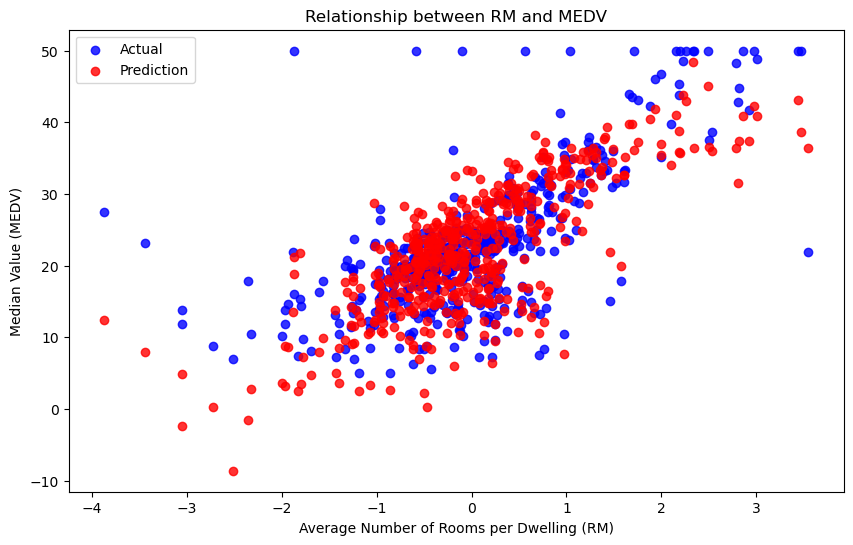

In [26]:
# Assuming 'RM' (average number of rooms per dwelling) is a significant feature

feature_names = list(data.columns[:-1])  # Assuming the last column is the target
feature_index_of_RM = feature_names.index('RM')

plt.figure(figsize=(10, 6))
plt.scatter(X[:, feature_index_of_RM], y, color='blue', label='Actual', alpha=0.8)
plt.scatter(X[:, feature_index_of_RM], predictions_train, color='red', label='Prediction', alpha=0.8)
plt.xlabel('Average Number of Rooms per Dwelling (RM)')
plt.ylabel('Median Value (MEDV)')
plt.title('Relationship between RM and MEDV')
plt.legend()
plt.show()